In [1]:
from pylab import *
import numpy as np

# Homework 6: Angular Momentum

## Part I
The centrifugal radius: $R_c = \frac{j^2}{GM_*}$ tells us how angular momentum determines the radius at which material is deposited at during infall into disk formation. 
If we assume angular momentum conservation from the envelope down to the disk scales, we know that over time each infalling layer, i,  at a radius of $r_i$ has specific angular momentum $j_i = r_i^2 \Omega_i$.

### part a
In the TSC model, for $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$, each layer falls from a radius $r_i = (m_0/2) c_s t$ where $m_0 = 0.975$, a dimensionless constant and $c_s$ is the isothermal sound speed. 
For this model, derive $M_{*}(t)$ and $R_c(t)$. 

### part b
The break-up angular velocity of a rotating body is defined as where the gravitational energy is equal to the rotational energy. Above this value, the body would be torn apart by rotation as gravity would not be able to hold it together. 
Derive the break-up velocity for a protostellar core and calculate it in radians per second for a 1 solar mass core of about 0.1 pc in size. 

### part c
Plot $Rc(t)$ for $c_s = 0.2 \ \mathrm{km \ s^{-1}}$ and $\Omega_i = 2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ for t between 0 and 500 kyr. How fast is the input angular velocity compared to break up? What is the resulting disk size at t=500 kyr? How much mass would have infallen in that time span?

### part d
So far we have only been assuming that $\Omega_i$ is constant solid body rotation, but in principle $\Omega_i(r)$ could be a function of radius within the protostellar core. For instance, if we take the scaling of an turbulent sub-sonic eddy as in Larson's law, $v_{rot} \propto R^{-0.33}$. Solve for the corresponding $\Omega_i(r)$ and $Rc(t)$ with this more generalized behavior. 

### part e
Let's say that the angular velocity has the form: $\Omega_s \left( \frac{r}{r_s}\right)^{p}$. Where $\Omega_s =  2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ at $r_s = 0.05 \ \mathrm{pc}$ (to match measured values from observations at the same scale). Plot $Rc(t)$ for both the  uniform $\Omega_i$ and the turbulent $\Omega_i$ case on the same plot, assuming the power-law form above. When do both models have the same $R_c$? 
Based on what you know about mass deposition during disk formation, qualitatively, what would be the difference betweeen the disks formed under these two assumptions?

# for part a


## For $M_*(t)$

$\dot{M}_{in} = \frac{m_0 c_s^3}{G}$
 
$\frac{dM}{dt} = \frac{m_0 c_s^3}{G}$
 
${dM} = \frac{m_0 c_s^3}{G} {dt}$
 
$\int_{0}^{M} {dM} = \int_{0}^{t} \frac{m_0 c_s^3}{G} {dt} $ 

$M_*(t) = \frac{m_0 c_s^3 t}{G}$

## For $R_c(t)$

$R_c = \frac{j^2}{GM_*}$ and inserting $j_i = r_i^2 \Omega_i$, $M_*(t)$, $r_i = (m_0/2) c_s t$ 

$\large R_c = \frac{((m_0/2 c_s t)^2 \Omega)^2}{G \frac{m_0 c_s^3 t}{G}}$

$\large R_c = \frac{(m_0 c_s t)^4 \Omega^2}{16 G \frac{m_0 c_s^3 t}{G}}$

$R_c(t) = \frac{\Omega^2}{16} m_0^3 c_s t^3$



# for part b

$E_U = - \frac{3}{5}\frac{GMm}{R}$ for Gravitational Energy

$E_{ROT} = \frac{1}{2} I \Omega^2$, where $I = \frac{2}{5}mR^2$ for Rotational Energy

We set them both equal to each other and solve for $\Omega$:

$\frac{3}{5}\frac{GMm}{R} = \frac{1}{2} \frac{2}{5}mR^2 \Omega^2$

$\Omega = \sqrt{\frac{3GM}{R^3}}$

In [2]:
M = 1.989e33
G = 6.67e-8
pc = 3.086e18
R = 0.1*pc
m_0 = 0.975

Omega = np.sqrt(3*G*M/R**3)

print(Omega)

1.1637161280516185e-13


# part c

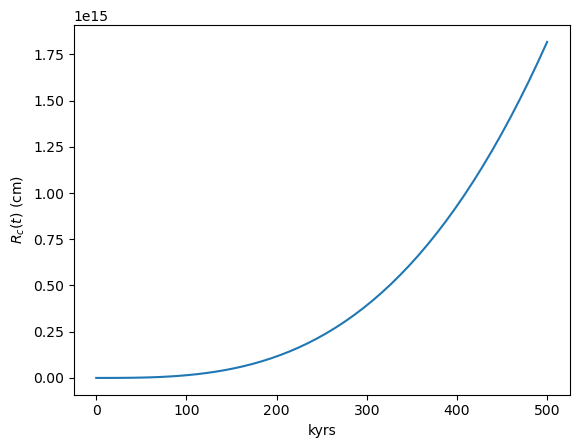

The amount of infallen mass is: 0.9270658788252932 solar masses
The resulting disk size is: 0.0005887321645403875 parsecs


In [3]:
def R_c(t,omega,c):
    Rc = omega**2 * m_0**3 * c * t**3 / 16
    return Rc

def M_star(t,c):
    M = m_0 * c_s**3 * t / G
    return M

yr = 365*86400
c_s = 2e4
times = np.linspace(0,500000*yr)
uniformOmega = 2e-14

Rdata = R_c(times,uniformOmega,c_s)
Mdata = M_star(times,c_s)

plot(times/(1000*yr),Rdata)
xlabel("kyrs")
ylabel(r"$R_c(t)$ (cm)")
show()

print("The amount of infallen mass is:", Mdata[-1]/M, "solar masses")
print("The resulting disk size is:", Rdata[-1]/pc, "parsecs")

# part d

# part e

/var/folders/p6/5_zqgch90wg6nj31xhykqv3m0000gn/T/ipykernel_86405/3313765657.py:4: RuntimeWarning: divide by zero encountered in power
  tOm = omega_s * (r/r_s)**p
/var/folders/p6/5_zqgch90wg6nj31xhykqv3m0000gn/T/ipykernel_86405/1161631642.py:2: RuntimeWarning: invalid value encountered in multiply
  Rc = omega**2 * m_0**3 * c * t**3 / 16


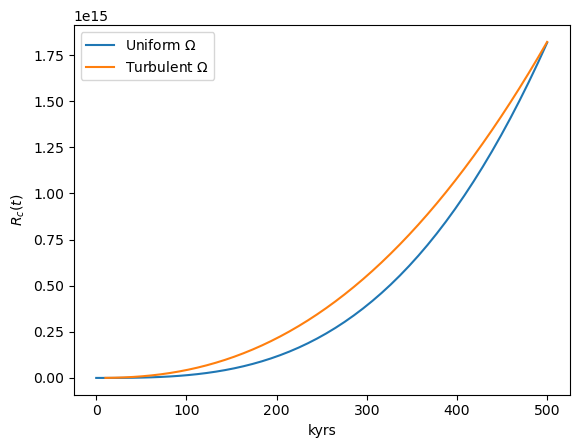

In [4]:
def turbulentOmega(t,p):
    r_s = 0.05*pc
    r = (m_0/2) * c_s * t
    tOm = omega_s * (r/r_s)**p
    return tOm

omega_s = 2e-14
p = -1/3
tOmega = turbulentOmega(times,p)

uniformR = R_c(times,uniformOmega,c_s)
turbulentR = R_c(times,tOmega,c_s)

plot(times/(1000*yr), uniformR, label= r'Uniform $\Omega$')
plot(times/(1000*yr), turbulentR, label = r'Turbulent $\Omega$')
xlabel('kyrs')
ylabel(r'$R_c(t)$')
legend()
show()

# part e

They seem to have have the same $R_c(t)$ around about 40-50kyrs and about 500 kyrs.

The uniform angular speed version will have a uniform disk structure/formation, whereas the turbulent angular speed will more than likely have a chaotic/nonuniform disk structure

## Part II: *Menu* 

For additional menu points this week, use the $Rc(t)$ you calculated above, and the $\dot{\Sigma}(r,t)$ profile from Cassen+Moosman 1981 to numerically integrate through time to calculate $\Sigma(t)$ for the two cases in part d. (This gives us a very rough understanding of the resulting disk as it does not take into account angular momentum transport during this phase). Plot the resulting surface density profiles and comment on their differences. 

*Hint*: You may want your timesteps to be logarithmically spaced